In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


# Data Preparation and Exploration

In [42]:
df=pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [44]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [45]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [46]:
df.duplicated().sum()

0

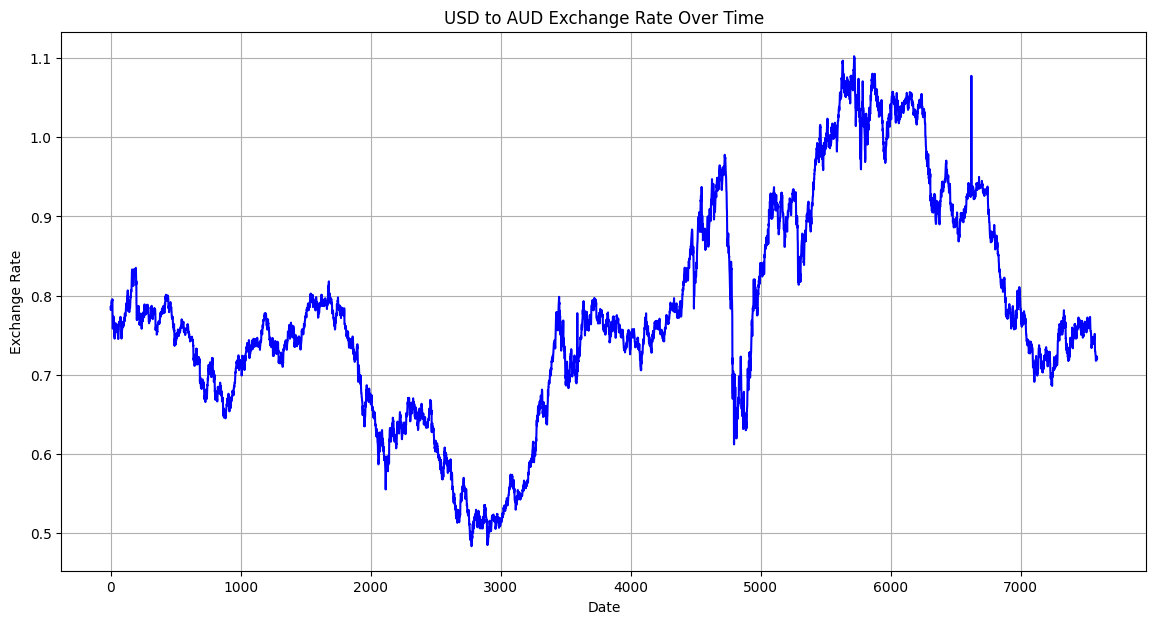

In [47]:
plt.figure(figsize=(14, 7))
plt.plot(df['Ex_rate'], color='blue')  # Changed column name here
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

In [48]:
# To install the library
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00


a

# AUTO ARIMA MODEL

In [49]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['Ex_rate'].head(4000), start_p=1, start_q=1,
                          max_p=2, max_q=2, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-30883.702, Time=39.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-22622.990, Time=1.46 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-30114.000, Time=13.78 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-25878.426, Time=27.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-22624.463, Time=0.56 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-29070.949, Time=4.03 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-30521.741, Time=20.25 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-30781.082, Time=59.26 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-30117.691, Time=21.06 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-30862.394, Time=101.99 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-30763.863, Time=18.29 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=65.10 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-30798.312, Time=29.66 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-22623.503, T

In [50]:
# To print the summary
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 4000
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood               15674.011
Date:                              Fri, 30 Aug 2024   AIC                         -31334.021
Time:                                      14:03:48   BIC                         -31289.984
Sample:                                           0   HQIC                        -31318.409
                                             - 4000                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.726e-06   1.33e-05      0.506      0.613   -1.93e-05    3.28e-05
ar.L1          0.1781      0.039      4.511      0.000       0.101       0.255
ar.L2          0.7858      0.037     20.959      0.000       0.712       0.859
ma.L1          0.7143      0.039     18.207      0.000       0.637       0.791
ma.L2         -0.1401      0.010    -14.294      0.000      -0.159      -0.121
ma.S.L12      -0.8827      0.009    -95.445      0.000      -0.901      -0.865
sigma2      2.057e-05   1.42e-07    145.162      0.000    2.03e-05    2.08e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):            157554.50
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
df['Ex_rate'].head(4000)

,Ex_rate
0,0.78550
1,0.78180
2,0.78670
3,0.78600
4,0.78490
...,...
3995,0.72585
3996,0.72905
3997,0.73170
3998,0.73195


In [52]:
df['Ex_rate'].tail(3000)

,Ex_rate
4588,0.881550
4589,0.881850
4590,0.888650
4591,0.892500
4592,0.900050
...,...
7583,0.718494
7584,0.721839
7585,0.723197
7586,0.720825


In [53]:
# Split data into train / test sets
train = df['Ex_rate'].head(5691)
test = df['Ex_rate'].tail(1896)

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
				order = (0, 1, 1),
				seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Ex_rate   No. Observations:                 5691
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood               20598.473
Date:                             Fri, 30 Aug 2024   AIC                         -41188.946
Time:                                     14:04:00   BIC                         -41162.369
Sample:                                          0   HQIC                        -41179.691
                                            - 5691                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0514      0.006     -8.853      0.000      -0.063      -0.040
ar.S.L12      -0.6364      0.006   -114.026      0.000      -0.647      -0.625
ar.S.L24      -0.3183      0.007    -43.317      0.000      -0.333      -0.304
sigma2       4.13e-05   2.83e-07    146.085      0.000    4.08e-05    4.19e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):             45805.02
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               3.44   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

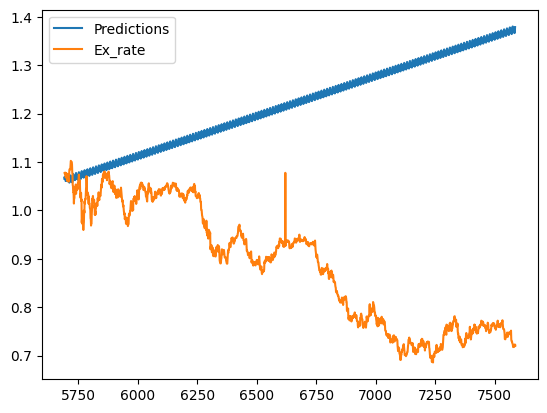

In [54]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test.plot(legend = True)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


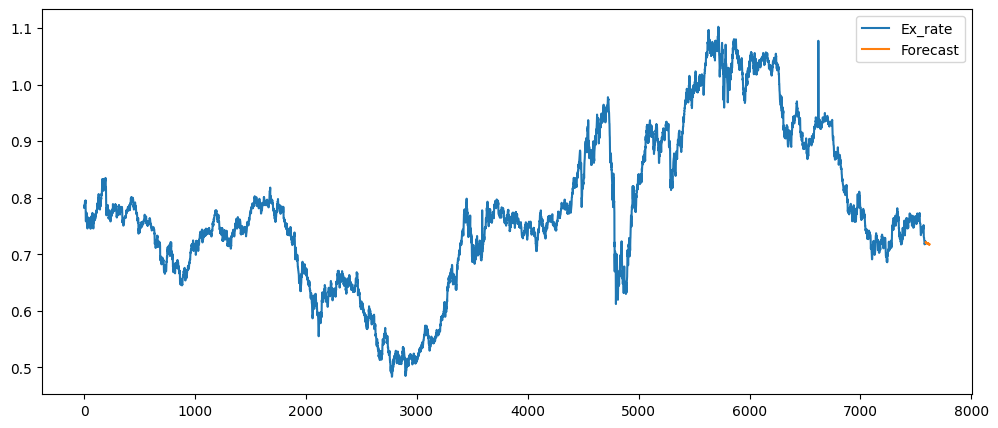

In [40]:
df['Ex_rate'] = pd.to_numeric(df['Ex_rate'], errors='coerce')
model = SARIMAX(df['Ex_rate'], order=(0, 1, 1), seasonal_order=(2, 1, 1, 12)) # Use the numeric column
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start=len(df),
                        end=(len(df)-1) + 3 * 12,
                        typ='levels').rename('Forecast')

# Plot the forecast values
df['Ex_rate'].plot(figsize=(12, 5), legend=True) # Plot the numeric column
forecast.plot(legend=True)
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test, predictions))

# Calculate mean squared error
mean_squared_error(test, predictions)

0.3924350404641496


0.15400526098409875

In [56]:
df0=pd.DataFrame({
    'Model':['ARIMA'],
    'RMSE':[rmse(test, predictions)],
    'MSE':[mean_squared_error(test, predictions)]
})
df0

,Model,RMSE,MSE
0,ARIMA,0.392435,0.154005


#ARIMA MODEL

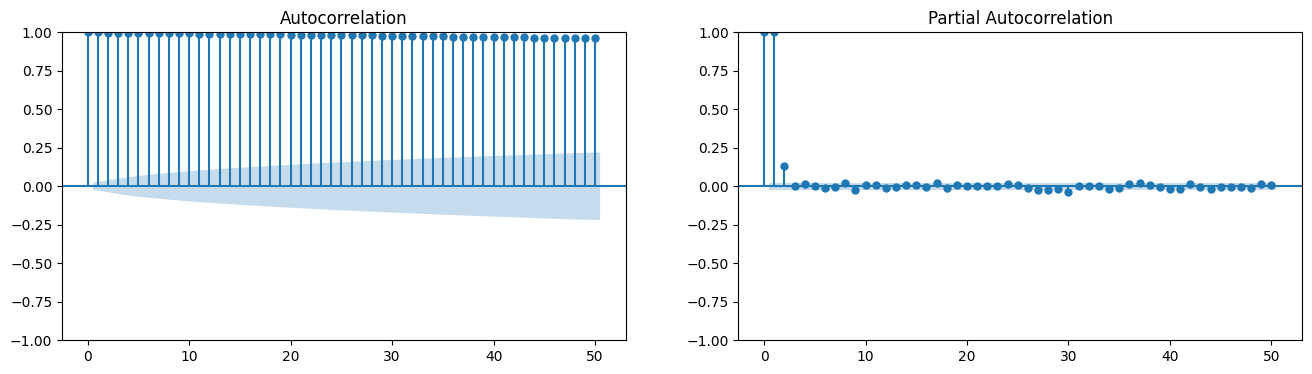

In [57]:
# Plot ACF and PACF to choose p, d, q
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Ex_rate'], ax=ax[0], lags=50)
plot_pacf(df['Ex_rate'], ax=ax[1], lags=50)
plt.show()

# Assuming we decide on p=1, d=1, q=1 based on plots
p = 1
d = 1
q = 1


In [58]:
# Fit ARIMA model
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
model_arima_fit = model_arima.fit()

# Summary of the model
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 30 Aug 2024   AIC                         -56102.322
Time:                        14:04:02   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

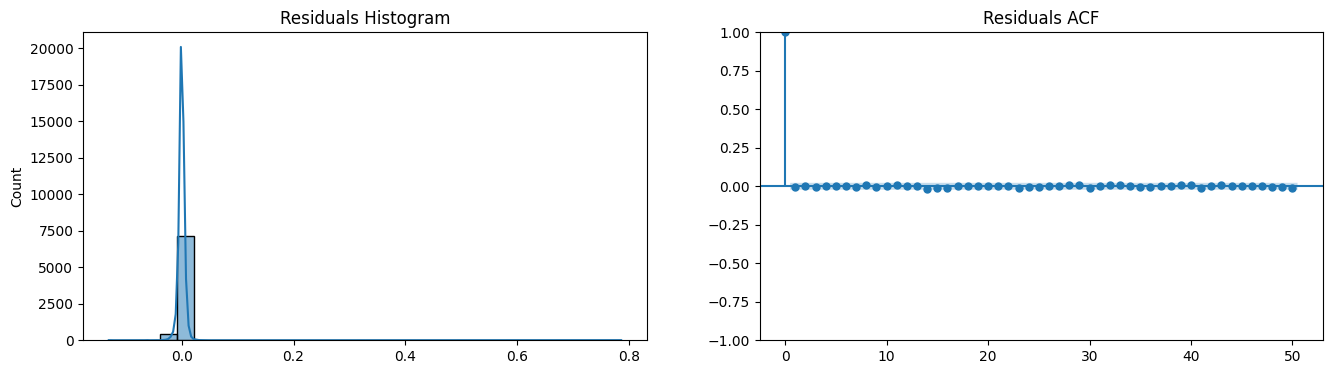

In [59]:
# Plot residuals
residuals = model_arima_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Residuals Histogram')
plot_acf(residuals, ax=ax[1], lags=50)
ax[1].set_title('Residuals ACF')
plt.show()

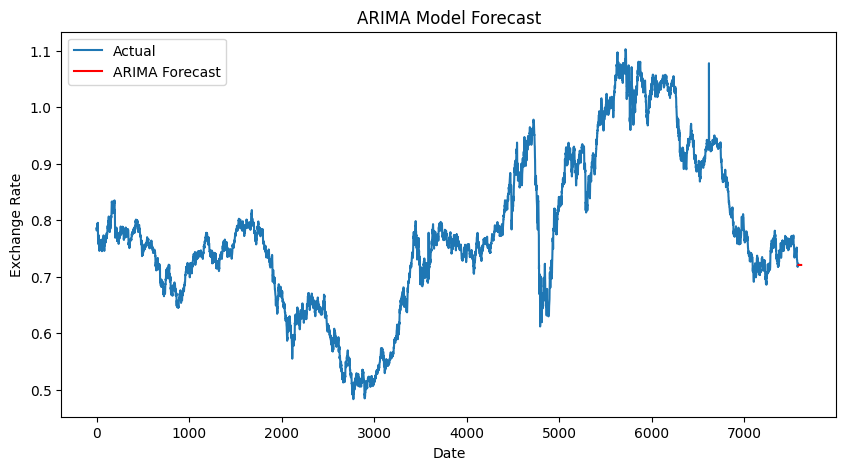

In [60]:
# Forecasting
forecast_arima = model_arima_fit.forecast(steps=30)  # Forecasting for next 30 days
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Model Building - Exponential Smoothing

In [61]:
# Fit Holt-Winters model (assuming trend and seasonality)
model_es = ExponentialSmoothing(df['Ex_rate'], seasonal='add', trend='add', seasonal_periods=12)
model_es_fit = model_es.fit(optimized=True)

# Summary of the model
print(model_es_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Fri, 30 Aug 2024
Box-Cox:                          False   Time:                         14:04:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

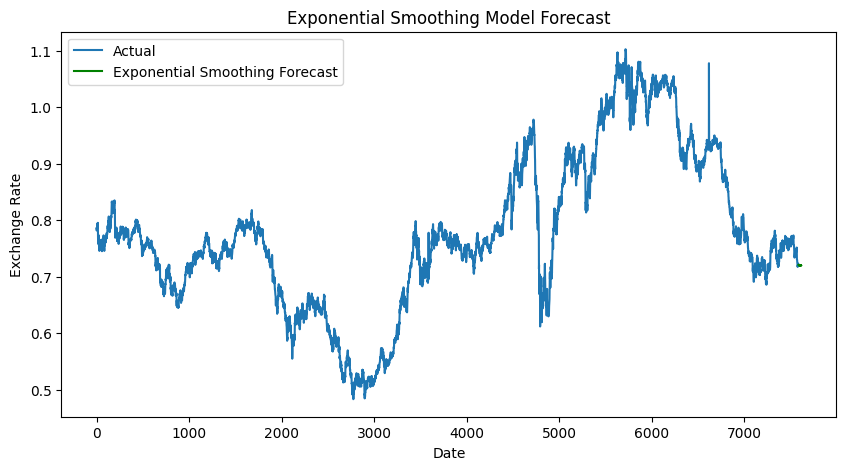

In [62]:
# Forecasting
forecast_es = model_es_fit.forecast(steps=30)  # Forecasting for next 30 days
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_es.index, forecast_es, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [63]:
# Combine actual and forecasted data for comparison
actual = df['Ex_rate'][-30:]  # Last 30 days of actual data

# Error Metrics
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = sqrt(mean_squared_error(actual, forecast_arima))
mape_arima = np.mean(np.abs((actual - forecast_arima) / actual)) * 100

In [64]:
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = sqrt(mean_squared_error(actual, forecast_es))
mape_es = np.mean(np.abs((actual - forecast_es) / actual)) * 100

In [65]:
df1=pd.DataFrame({
    'Model':['ARIMA','Exponential Smoothing'],
    'MAE':[mae_arima,mae_es],
    'RMSE':[rmse_arima,rmse_es],
    'MAPE':[mape_arima,mape_es]
})
df1

,Model,MAE,RMSE,MAPE
0,ARIMA,0.012724,0.016983,NaN
1,Exponential Smoothing,0.013018,0.017246,NaN


# Evaluation and Comparsion

In [66]:
# Error Metrics Calculation
def calculate_mape(actual, forecast):
    actual, forecast = np.array(actual), np.array(forecast)
    non_zero_actual = actual != 0
    if np.any(non_zero_actual):
        mape = np.mean(np.abs((actual[non_zero_actual] - forecast[non_zero_actual]) / actual[non_zero_actual])) * 100
    else:
        mape = np.nan  # Return NaN if all actual values are zero
    return mape

In [67]:
# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = sqrt(mean_squared_error(actual, forecast_arima))
mape_arima = calculate_mape(actual, forecast_arima)

# Compute error metrics for Exponential Smoothing
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = sqrt(mean_squared_error(actual, forecast_es))
mape_es = calculate_mape(actual, forecast_es)

In [68]:
df2=pd.DataFrame({
    'Model':['ARIMA','Exponential Smoothing'],
    'MAE':[mae_arima,mae_es],
    'RMSE':[rmse_arima,rmse_es],
    'MAPE':[mape_arima,mape_es]
})

In [69]:
df0

,Model,RMSE,MSE
0,ARIMA,0.392435,0.154005


In [70]:
df1

,Model,MAE,RMSE,MAPE
0,ARIMA,0.012724,0.016983,NaN
1,Exponential Smoothing,0.013018,0.017246,NaN


In [71]:
df2

,Model,MAE,RMSE,MAPE
0,ARIMA,0.012724,0.016983,1.711921
1,Exponential Smoothing,0.013018,0.017246,1.751758
